## EE 361M - Assignment #3
### Rohan Nagar, Zuhair Parvez, Wenyang Fu

## Question 1 (2+1 = 3 points)

View the video at:

https://www.youtube.com/watch?v=jbkSRLYSojo

(Hans Rosling's 200 Countries, 200 Years, 4 Minutes) and answer the following questions:

1. How many variables are being visualized in the “moving bubble plots” video (list them)?

2. Identify a variable that is “zoomed into”, i.e., examined at a sub-category or more detailed level.

### Question 1.1

Four variables are being visualized:

1. Average Health (Life Expectancy) in each country
2. Average Wealth (Income per person) in each country
3. Time
4. Population

Health is on the y-axis, wealth is on the x-axis, time is visualized as the bubbles move, and population is the size of each bubble.

### Question 1.2

The average health and average wealth variables are examined at a sub category. In the video, he splits up the bubble for China into some of the provinces in China. These sub-bubbles can be placed on the grid, and we can see that there is a wide variation even within countries themselves.

## Question 2 (3+3+2+2=10 points)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The dataset is prostate cancer data. The data can be found on canvas on the homework 3 page as prostate.csv. More information on the data can be found [here](https://cran.r-project.org/web/packages/ElemStatLearn/ElemStatLearn.pdf) under prostate. Use a random state of 42 and a test size of 1/3 to [split the data into training and test](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). We will be using all the variables to predict lcavol. 

1. Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter lambda (Note: lambda is called alpha in sklearn), use [0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100]  for ridge and [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5] for lasso. Report the best chosen based on cross-validation. The cross validation should happen on your training data using  average MSE as the scoring metric.
2. Run ridge and lasso for all of the parameters specified above (on all training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? 
3. Run least squares regression, ridge, and lasso on the full training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error on the test data for each.
4. For the best lasso parameter, determine the variables that were not dropped. Using only these variables, run least squares regression on full training data and report the prediction error on the test data.

### Question 2.1

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('prostate.csv')
print(data.head(5))

     lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564


In [2]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Slice columns - We want to predict lcavol given everything else.
X, y = data.iloc[:, 1:], data.iloc[:, 0]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
# KFold object is made redundant by cv=5 parameter in cross_validation.cross_val_score
# kf = KFold(len(X_train), n_folds=5) # 5-fold cross validation iterator
ridge_clf = Ridge()
lasso_clf = Lasso()
ridge_scores = []
lasso_scores = []
# scores_std = []
alphas_ridge = [0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100]
alphas_lasso = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]


# Iterate through all regularization parameters for Ridge model
for alpha in alphas_ridge:
    ridge_clf.alpha = alpha
    # Split training data into training and validation sets
    # using 5-fold cross validation.
    this_scores = cross_val_score(
        ridge_clf, X_train, y_train, scoring='mean_squared_error', cv=5)
    # Note: https://github.com/scikit-learn/scikit-learn/issues/5023
    # cross_val_score will return the negative MSE for some reason,
    # so we need to do absolute value on it.
    ridge_scores.append(np.fabs(np.mean(this_scores)))
#     scores_std.append(np.std(this_scores))
    
print("Ridge Regression Model Scores:")
for index, score in enumerate(ridge_scores):
# for i in range(len(scores)):
    print("lambda = {}, score = {}".format(alphas_ridge[index] ,score))
best_ridge_index = ridge_scores.index(min(ridge_scores))
print("""The best Ridge Regression model has a lambda of: {}
        with an average MSE of: {}""".format(alphas_ridge[best_ridge_index],
        ridge_scores[best_ridge_index]))


# Iterate through all regularization parameters for Lasso model
for alpha in alphas_lasso:
    lasso_clf.alpha = alpha
    # Split training data into training and validation sets
    # using 5-fold cross validation.
    this_scores = cross_val_score(
        lasso_clf, X_train, y_train, scoring='mean_squared_error', cv=5)
    lasso_scores.append(np.fabs(np.mean(this_scores)))
    
print("Lasso Model Scores:")
for index, score in enumerate(lasso_scores):
# for i in range(len(scores)):
    print("lambda = {}, score = {}".format(alphas_lasso[index], score))
best_lasso_index = lasso_scores.index(min(lasso_scores))
print("""The best Lasso Regression model has a lambda of: {}
        with an average MSE of: {}""".format(alphas_lasso[best_lasso_index],
        lasso_scores[best_lasso_index]))

Ridge Regression Model Scores:
lambda = 1e-05, score = 0.6268401311040128
lambda = 0.0001, score = 0.626838042779035
lambda = 0.001, score = 0.6268171641097615
lambda = 0.005, score = 0.6267244706545755
lambda = 0.01, score = 0.6266088342831418
lambda = 0.05, score = 0.6256928456994651
lambda = 0.1, score = 0.6245700714740547
lambda = 1, score = 0.6077390407203707
lambda = 5, score = 0.5695286039933147
lambda = 10, score = 0.5521097883449718
lambda = 100, score = 0.7435368294670907
The best Ridge Regression model has a lambda of: 10
        with an average MSE of: 0.5521097883449718
Lasso Model Scores:
lambda = 0.0001, score = 0.6264300066359773
lambda = 0.0005, score = 0.6247922049995644
lambda = 0.001, score = 0.6227764992784917
lambda = 0.005, score = 0.6088042149745041
lambda = 0.01, score = 0.5944291516960878
lambda = 0.05, score = 0.5628138482345022
lambda = 0.1, score = 0.5601228752641442
lambda = 0.2, score = 0.5821603218309226
lambda = 0.3, score = 0.6492888232278051
lambda = 

The best Ridge Regression Model has a lambda of 10, with a MSE of ~.55211.

The best Lasso Regression Model has a lambda of 0.1, with a MSE of ~.56012.

One lesson I learned here was to not prematurely optimize my code. Supposedly, cross_validation.cross_val_score() can be run on multiple CPUs, but my code ended up taking ~30 times longer to run when I ran cross_val_score() on multiple cores, as opposed to running it on a default single core.

### Question 2.2

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


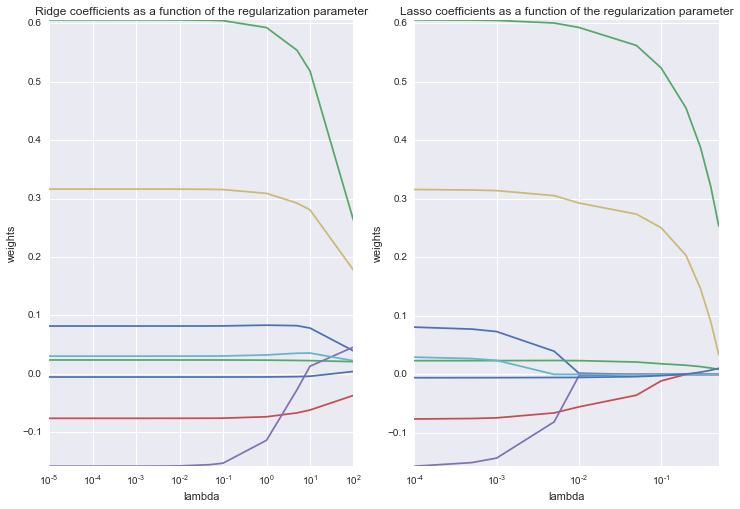

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###############################################################################
# Compute paths

ridge_coefs = []
for a in alphas_ridge:
    ridge_clf.set_params(alpha=a)
    ridge_clf.fit(X_train, y_train)
    ridge_coefs.append(ridge_clf.coef_)

lasso_coefs = []
for a in alphas_lasso:
    lasso_clf.set_params(alpha=a)
    lasso_clf.fit(X_train, y_train)
    lasso_coefs.append(lasso_clf.coef_)
    
###############################################################################
# Display results

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1) # one row, one column, first plot

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(12,8)) # This code is far more concise!

# ax1.set_prop_cycle(color=['b', 'r', 'g', 'c', 'k', 'y', 'm'])
ax1.plot(alphas_ridge, ridge_coefs)
ax1.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax1.set_title('Ridge coefficients as a function of the regularization parameter')
ax1.set_xlabel('lambda')
ax1.set_ylabel('weights')
ax1.axis('tight')

# ax2.set_prop_cycle(color=['b', 'r', 'g', 'c', 'k', 'y', 'm'])
ax2.plot(alphas_lasso, lasso_coefs)
ax2.set_xscale('log')
ax2.set_xlabel('lambda')
ax2.set_ylabel('weights')
ax2.set_title('Lasso coefficients as a function of the regularization parameter')
ax2.axis('tight')
plt.show()

As the regularization parameter increases, the weights of each model converge.

### Question 2.3

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

###############################################################################
# Fit models

linear_clf = LinearRegression()
ridge_clf.set_params(alpha=10)
lasso_clf.set_params(alpha=0.1)

linear_clf.fit(X_train, y_train)
ridge_clf.fit(X_train, y_train) 
lasso_clf.fit(X_train, y_train)

# linear_score = linear_clf.score(X_test, y_test)
# ridge_score = ridge_clf.score(X_test, y_test) 
# lasso_score = lasso_clf.score(X_test, y_test)

linear_score = mean_squared_error(y_test, linear_clf.predict(X_test))
ridge_score = mean_squared_error(y_test, ridge_clf.predict(X_test)) 
lasso_score = mean_squared_error(y_test, lasso_clf.predict(X_test))

print("Least Squares Regression MSE: {}".format(linear_score))
print("Ridge Regression MSE: {}".format(ridge_score))
print("Lasso Regression MSE: {}".format(lasso_score))


Least Squares Regression MSE: 0.5437839381731426
Ridge Regression MSE: 0.5449942351946779
Lasso Regression MSE: 0.5649619867511488


### Question 2.4

In [5]:
from sklearn.feature_selection import SelectFromModel

X_train_reduced = []
X_test_reduced = []

#########################################################
# Sanity Checks
print("Number of non-zero features in Lasso()")

#########################################################
# Feature selection
# Use a Lasso model with regularization parameter of 0.1
# to discard features with weights <= 0.
sfm = SelectFromModel(lasso_clf, threshold=np.nextafter(0,1))
X_train_reduced = sfm.fit_transform(X_train, y_train)
# Not sure if I'm reducing the test set correctly..
X_test_reduced = sfm.transform(X_test)
print("Number of features remaining: {}".format(X_test_reduced.shape[1]))

#########################################################
# Least Squares Regression fit after feature selection
linear_clf.fit(X_train_reduced, y_train)

#########################################################
# Model fitting
mse = mean_squared_error(y_test, linear_clf.predict(X_test_reduced))

#########################################################
# Output Results
print("Least Squares Regression MSE after feature selection: {}".format(mse))

Number of non-zero features in Lasso()
Number of features remaining: 5
Least Squares Regression MSE after feature selection: 0.5418084790847733


## Question 3 (3+3+2+2 = 10 points)

Re-solve all the questions in question 2 using R. You can submit the code and results via a PDF or other format. Just please make a reference to it in your notebook. See hints.R on the Canvas homework 3 page to help get you started. I would recommend using [RStudio](https://www.rstudio.com/products/rstudio/download/) for your work in R.

### Solutions to question 3 are attached in the submitted PDF.

## Question 4 (5+5 = 10 points)

1. Derive the coefficent updates, from first principles, for a gradient descent version of linear regression. Hint: start from the cost function. If you write the math by hand, submit that as a separate file and make a reference to it in your notebook or include the image in your notebook.
2. Write Python code for a gradient descent version of linear regression. Should be similar to sklearn in that you have a fit function that takes an X, y, learning rate, and number of iterations and a predict funtion that takes an X value. Use your new SGD regression to re-run question 2.4 and compare MSE. Make sure you always normalize your X matrices and use an intercept. You can also compare your results with SGDRegressor from sklearn, but not required.

### Question 4.1

### Question 4.2

## Question 5 (2+1+5+2 = 10 points)

We will use Google's Tensorflow to create a simple multi-layered perceptron. Installation instructions can be found [here](https://www.tensorflow.org/versions/r0.7/get_started/os_setup.html#pip-installation). To make our lives even easier, we will be using [skflow](https://github.com/tensorflow/skflow). This can be installed via pip install skflow. This is a higher level API on top of tensorflow. You can find documentation on how to get started on the skflow page.

To install tensorflow, this command should work (did on Mac):

sudo pip install --upgrade https://storage.googleapis.com/tensorflow/mac/tensorflow-0.7.0-py2-none-any.whl --ignore-installed

1. Use pandas to get spam classification [data](https://archive.ics.uci.edu/ml/datasets/Spambase) from UCI. Don't worry about getting the column names. The last column is a 1 if spam, zero otherwise.
2. Split the data into training and testing using test_size=0.33, random_state=42.
3. Use a TensorFlowDNNClassifier to classify whether an email is spam and report your testing accuracy. You should use 1 hidden layer with 5 units, 50,000 steps, and a learning rate of .05. What does each parameter do and why does it matter?
4. Compare your accuracy to a logistic regression using sklean. Discuss why one may have performed better than the other. You may also experiment with the architecture of your neural network (i.e. the number of hidden units, the number of nodes, the number of steps, and the learning rate) to see if you can improve your results from part 3.

### Question 5.1

In [4]:
# Load the data
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data", header=None)
data = data.dropna()

print(data.shape)
data.head()

(4601, 58)


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


### Question 5.2

In [10]:
# Split data into train and test
indep_data = data.iloc[:,:57]
dep_data = data[57]
indep_train, indep_test, dep_train, dep_test = train_test_split(indep_data, dep_data, test_size=0.33, random_state=42)

### Question 5.3

In [11]:
import skflow

classifier = skflow.TensorFlowDNNClassifier(hidden_units=[5], n_classes=2, steps=50000, learning_rate=0.05)
classifier.fit(indep_train, dep_train)
score = accuracy_score(classifier.predict(indep_test), dep_test)
print("Accuracy: %f" % score)

Step #1, avg. loss: 5.17732
Step #5001, epoch #51, avg. loss: 0.80931
Step #10001, epoch #103, avg. loss: 0.85908
Step #15001, epoch #154, avg. loss: 0.77170
Step #20001, epoch #206, avg. loss: 0.72194
Step #25001, epoch #257, avg. loss: 0.69393
Step #30001, epoch #309, avg. loss: 0.63862
Step #35001, epoch #360, avg. loss: 0.62803
Step #40001, epoch #412, avg. loss: 0.63735
Step #45001, epoch #463, avg. loss: 0.62265
Accuracy: 0.748519


The `hidden_units` parameter tells the function how many layers and hidden units per layer there should be. In our case, we only have one layer (since there is only one number in the list), and that layer has 5 hidden units. This matters because it is the number of nonlinear transformations that the input data will go through before it goes through the output layer.

The `n_classes` parameter tells the network how many classifications the independent variable has. In our case, we have 2, the email is either spam or not spam.

The `steps` parameter is the iteration count. This is how long we want to train for. The higher the number, the more epochs we will go through which means we will iterate through the data more. This is important because we need to determine the right amount of epochs to train on to reduce error.

The `learning_rate` parameter is the speed of the training. Since stochastic gradient decsent is used to update the weights, we have to provide this learning_rate. The higher the learning rate, the more we will change the weights by after each iteration. It is important to get a learning rate that is not too high and not too low, so that we are able to settle into the optimum nicely.

### Question 5.4

In [12]:
regr = linear_model.LogisticRegression()
regr.fit(indep_train, dep_train)
score = accuracy_score(regr.predict(indep_test), dep_test)
print("Accuracy: %f" % score)

Accuracy: 0.930876


Logistic regression performed very well in this situation. This could be because our multi-layered perceptron network did not have the right number of hidden units, steps, or learning rate. Tweaking these parameters could have a significant effect on the final model. As we have seen in class, there are cases of overfitting and underfitting, and getting it right in the sweet spot is more difficult (requires validation and testing, which we didn't do). So these parameters could have been not as good as they could be, which could cause the difference in accuracy. Also, logistic regression is very good at binary classification, which is what we have here. That is another reason that the logistic regression model performed better.

## Question 6 (2+2+3 = 7 points)

1. State briefly what you understand by the bias-variance tradeoff.

2. For a given model and problem, what happens to these two quantities when the amount of training data available decreases, keeping all other factors remaining the same ( e.g. if 5-fold CV was used to train the original model, the same is used for the smaller dataset)?

3. Suppose you want to approximate the pdf of a continuous random variable $X$, that takes on values over the interval (a,b), as follows: Get $N$ i.i.d samples of $X$; bin the interval into $k$ equi-spaced bins, and construct a histogram, which you then normalize so that total area under the histogram is 1. This normalized histogram will be an approximation of the true pdf. Clearly the histogram will change if you repeat this experiment using another $N$ samples; hence you can consider the quality of the solution in term of the 'mean' histogram (bias) and the variations among the histograms (variance).  Qualitatively explain how you would expect the bias-variance tradeoff to be reflected in this situation, as a function of $k$.

### Question 6.1

First, we should define bias and variance. Bias is how good your average model is, while variance is how sensitive the model is to variations in data.

Bias and variance are a tradeoff. If the model that we are trying to obtain is simpler, then the bias will grow larger while the variance becomes smaller. On the other hand, if the model we are trying to obtain is more complex, then the bias will shrink while the variance gets larger.

This is because with a simple model, changes in data will not cause big changes in the model. However, in a simple model it's much harder to get to the true model. For example, if you are fitting a linear line to a model that should be sinusoidal, it will be very hard to hit the true model.

On the other hand, for a complex model, variations in data can cause your model to change drastically. But, you can get closer to the true model because you are able to fit more precisely.

### Question 6.2

If the amount of training data decreases, then our variance will increase. This is beacuse with less data, we cannot fit as complex a model. If we try to, then we run the risk of overfitting, which means that slight changes in data will drastically change our model.

Our bias will stay the same, however. This is beacuse it doesn't matter if we average one piece at a time or 100 at a time -- at the end our average of averages will remain the same.

### Question 6.3

$k$ is our number of bins. As we increase $k$, we would expect the bias to become smaller and the variance to become higher. This is like our "complex" model. With more bins, less data is going to fall into each bin. This means that with varying sets of data, the number of data points in each bin can change drastically. This amounts to high variance. But of course, our bias will go down because our average histogram pdf will be closer to the true pdf. With more bins (and taking the average of all our models), we can get more fine grained toward seeing the true pdf.

As we decrease $k$, we would expect the bias to grow larger and the variance to become smaller. This is like our "simple" model. With few bins, more data will fall into each bin, so with different sets of data not much will change in the model. However, the average solution will be much further from the actual pdf, since we have fewer bins and less room for accuracy.